In [ ]:
import os
import pandas as pd
from datetime import datetime

base_input_folder = r"D:\mini-1\0to999999_BlockTransaction"
output_folder = r"D:\bhavya\daywise1"
mapping_file = r"D:\bhavya\addressmappp.txt"
chunk_size = 100_000

os.makedirs(output_folder, exist_ok=True)


address_to_id = {}
current_id = 1

if os.path.exists(mapping_file):
    with open(mapping_file, "r") as f:
        for line in f:
            address, id_str = line.strip().split()
            address_to_id[address] = int(id_str)
    current_id = max(address_to_id.values()) + 1

def get_address_id(address):
    global current_id
    if address not in address_to_id:
        address_to_id[address] = current_id
        current_id += 1
    return address_to_id[address]


for folder_name in sorted(os.listdir(base_input_folder)):
    if folder_name == "0-1":
        continue   

    folder_path = os.path.join(base_input_folder, folder_name)
    if not os.path.isdir(folder_path):
        continue

    print(f"Processing folder: {folder_name}")

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            filepath = os.path.join(folder_path, filename)
            print(f"    Reading file: {filename}")

            printed_dates = set() 

            for chunk in pd.read_csv(filepath, chunksize=chunk_size):
                try:
               
                    chunk = chunk[["timestamp", "from", "to", "fromIsContract", "toIsContract", "value"]].copy()

                 
                    chunk["datetime"] = pd.to_datetime(chunk["timestamp"], unit='s')
                    chunk["date_str"] = chunk["datetime"].dt.strftime("%Y-%m-%d")

                 
                    chunk["from_id"] = chunk["from"].apply(get_address_id)
                    chunk["to_id"] = chunk["to"].apply(get_address_id)

                    grouped = chunk.groupby("date_str")

                    for date_str, group in grouped:
                        out_path = os.path.join(output_folder, f"{date_str}.txt")

                      
                        if date_str not in printed_dates:
                            print(f" Writing to: {out_path}")
                            printed_dates.add(date_str)

                        lines = group.apply(
                            lambda row: f"{int(row['timestamp'])}\t{row['datetime']}\t{row['from_id']}\t{row['to_id']}\t{row['fromIsContract']}\t{row['toIsContract']}\t{row['value']}\n",
                            axis=1
                        )

                        with open(out_path, "a") as f_out:
                            f_out.writelines(lines)

                except Exception as e:
                    print(f"Error while processing chunk: {e}")


with open(mapping_file, "w") as f:
    for address, id_num in address_to_id.items():
        f.write(f"{address} {id_num}\n")

print("Done! All folders (except 0-1) processed.")


Processing folder: 1-2
    Reading file: 1000000to1999999_BlockTransaction.csv
 Writing to: D:\bhavya\daywise1\2016-02-13.txt
 Writing to: D:\bhavya\daywise1\2016-02-14.txt
 Writing to: D:\bhavya\daywise1\2016-02-15.txt
 Writing to: D:\bhavya\daywise1\2016-02-16.txt
 Writing to: D:\bhavya\daywise1\2016-02-17.txt
 Writing to: D:\bhavya\daywise1\2016-02-18.txt
 Writing to: D:\bhavya\daywise1\2016-02-19.txt
 Writing to: D:\bhavya\daywise1\2016-02-20.txt
 Writing to: D:\bhavya\daywise1\2016-02-21.txt
 Writing to: D:\bhavya\daywise1\2016-02-22.txt
 Writing to: D:\bhavya\daywise1\2016-02-23.txt
 Writing to: D:\bhavya\daywise1\2016-02-24.txt
 Writing to: D:\bhavya\daywise1\2016-02-25.txt
 Writing to: D:\bhavya\daywise1\2016-02-26.txt
 Writing to: D:\bhavya\daywise1\2016-02-27.txt
 Writing to: D:\bhavya\daywise1\2016-02-28.txt
 Writing to: D:\bhavya\daywise1\2016-02-29.txt
 Writing to: D:\bhavya\daywise1\2016-03-01.txt
 Writing to: D:\bhavya\daywise1\2016-03-02.txt
 Writing to: D:\bhavya\daywi

In [ ]:
import os
import pandas as pd


input_folder = r"D:\bhavya\daywise1"


unique_nodes = set()

print("Starting to count unique nodes...\n")


for file in os.listdir(input_folder):
    if file.endswith(".txt"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing file: {file}")

        try:
            df = pd.read_csv(file_path, delim_whitespace=True, header=None)

            if df.shape[1] < 5:
                print(f"Skipping {file}, only {df.shape[1]} columns.")
                continue

            try:
                
                from_nodes = df.iloc[:, 3].astype(int)
                to_nodes = df.iloc[:, 4].astype(int)

                unique_nodes.update(from_nodes)
                unique_nodes.update(to_nodes)
            except Exception as e:
                print(f"Issue extracting nodes in {file}: {e}")
                continue

        except Exception as e:
            print(f"Error reading {file}: {e}")


print(f"\nTotal unique nodes across all files: {len(unique_nodes)}")


Starting to count unique nodes...

Processing file: 2016-02-13.txt
Processing file: 2016-02-14.txt
Processing file: 2016-02-15.txt
Processing file: 2016-02-16.txt
Processing file: 2016-02-17.txt
Processing file: 2016-02-18.txt
Processing file: 2016-02-19.txt
Processing file: 2016-02-20.txt
Processing file: 2016-02-21.txt
Processing file: 2016-02-22.txt
Processing file: 2016-02-23.txt
Processing file: 2016-02-24.txt
Processing file: 2016-02-25.txt
Processing file: 2016-02-26.txt
Processing file: 2016-02-27.txt
Processing file: 2016-02-28.txt
Processing file: 2016-02-29.txt
Processing file: 2016-03-01.txt
Processing file: 2016-03-02.txt
Processing file: 2016-03-03.txt
Processing file: 2016-03-04.txt
Processing file: 2016-03-05.txt
Processing file: 2016-03-06.txt
Processing file: 2016-03-07.txt
Processing file: 2016-03-08.txt
Processing file: 2016-03-09.txt
Processing file: 2016-03-10.txt
Processing file: 2016-03-11.txt
Processing file: 2016-03-12.txt
Processing file: 2016-03-13.txt
Proce

In [ ]:
import os

input_folder = r"D:\bhavya\daywise1"
output_folder = r"D:\bhavya\nodes"
count_output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\newcount.txt"

os.makedirs(output_folder, exist_ok=True)

seen_users = set()
daily_new_users = {}

file_list = sorted([f for f in os.listdir(input_folder) if f.endswith('.txt')])

for file in file_list:
    file_path = os.path.join(input_folder, file)
    output_nodes_path = os.path.join(output_folder, file)  
    current_file_users = set()
    date_in_file = None

    print(f"Processing file: {file}")

    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 8:
                date = parts[1]          
                from_id = parts[3]        
                to_id = parts[4]          

                current_file_users.add(from_id)
                current_file_users.add(to_id)

                if date_in_file is None:
                    date_in_file = date

    new_users = current_file_users - seen_users
    seen_users.update(new_users)

    with open(output_nodes_path, 'w') as out_f:
        for user_id in sorted(new_users, key=int):
            out_f.write(f"{user_id}\n")

    daily_new_users[date_in_file] = len(new_users)

with open(count_output_file, "w") as f:
    for date in sorted(daily_new_users.keys()):
        f.write(f"{date} {daily_new_users[date]}\n")

print(f"New user count saved to: {count_output_file}")
print(f"New user nodes saved in folder: {output_folder}")
print(f"Final total unique users: {len(seen_users)}")


Processing file: 2016-02-13.txt
Processing file: 2016-02-14.txt
Processing file: 2016-02-15.txt
Processing file: 2016-02-16.txt
Processing file: 2016-02-17.txt
Processing file: 2016-02-18.txt
Processing file: 2016-02-19.txt
Processing file: 2016-02-20.txt
Processing file: 2016-02-21.txt
Processing file: 2016-02-22.txt
Processing file: 2016-02-23.txt
Processing file: 2016-02-24.txt
Processing file: 2016-02-25.txt
Processing file: 2016-02-26.txt
Processing file: 2016-02-27.txt
Processing file: 2016-02-28.txt
Processing file: 2016-02-29.txt
Processing file: 2016-03-01.txt
Processing file: 2016-03-02.txt
Processing file: 2016-03-03.txt
Processing file: 2016-03-04.txt
Processing file: 2016-03-05.txt
Processing file: 2016-03-06.txt
Processing file: 2016-03-07.txt
Processing file: 2016-03-08.txt
Processing file: 2016-03-09.txt
Processing file: 2016-03-10.txt
Processing file: 2016-03-11.txt
Processing file: 2016-03-12.txt
Processing file: 2016-03-13.txt
Processing file: 2016-03-14.txt
Processi

In [ ]:
import plotly.graph_objects as go
from datetime import datetime


input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\newcount.txt"

dates = []
counts = []

with open(input_file, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
               
                clean_date = parts[0].replace('.txt', '')
                date = datetime.strptime(clean_date, "%Y-%m-%d")
                count = int(parts[1])
                dates.append(date)
                counts.append(count)
            except ValueError as ve:
                print("Skipping line due to parsing error:", line.strip(), "| Error:", ve)
                continue


if not dates or not counts:
    print("No valid data found. Please check the file format.")
else:
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=dates,
        y=counts,
        mode='lines+markers',
        name='newusers Count',
        line=dict(color='royalblue'),
        marker=dict(size=6)
    ))

 
    fig.update_layout(
        title="new users Count Over Time",
        xaxis_title="Date",
        yaxis_title="new users Count",
        xaxis=dict(
            range=[min(dates), max(dates)],
            rangeslider=dict(visible=True),
            type="date"
        ),
        yaxis=dict(
            range=[min(counts), max(counts)]
        ),
        template="plotly_white"
    )

    fig.show()


In [ ]:
import os
import re

input_folder = r"D:\bhavya\daywise1"
output_file =r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\edgecount.txt"

def extract_date(filename):
    match = re.search(r'(\d{4})-(\d{2})-(\d{2})', filename)
    if match:
        return match.group(0)
    return None

def count_lines(file_path):
    with open(file_path, 'r') as f:
        return sum(1 for _ in f)

try:
    files = os.listdir(input_folder)
    files = [f for f in files if f.endswith('.txt')]
    files.sort(key=lambda x: extract_date(x)) 

    with open(output_file, 'w') as out:
        for file_name in files:
            file_path = os.path.join(input_folder, file_name)
            count = count_lines(file_path)
            out.write(f"{file_name}  {count}\n")
            print(f"{file_name}: {count}")

    print(f"\nDone! Counts saved to: {output_file}")

except Exception as e:
    print(f"Error: {e}")


2016-02-13.txt: 1157
2016-02-14.txt: 16624
2016-02-15.txt: 17159
2016-02-16.txt: 17549
2016-02-17.txt: 19990
2016-02-18.txt: 16969
2016-02-19.txt: 18412
2016-02-20.txt: 16714
2016-02-21.txt: 17119
2016-02-22.txt: 18190
2016-02-23.txt: 18482
2016-02-24.txt: 19540
2016-02-25.txt: 19503
2016-02-26.txt: 21068
2016-02-27.txt: 18981
2016-02-28.txt: 19063
2016-02-29.txt: 20358
2016-03-01.txt: 21778
2016-03-02.txt: 23562
2016-03-03.txt: 24837
2016-03-04.txt: 24287
2016-03-05.txt: 27115
2016-03-06.txt: 27661
2016-03-07.txt: 23271
2016-03-08.txt: 24105
2016-03-09.txt: 24557
2016-03-10.txt: 24814
2016-03-11.txt: 23124
2016-03-12.txt: 27887
2016-03-13.txt: 28127
2016-03-14.txt: 28528
2016-03-15.txt: 29273
2016-03-16.txt: 27596
2016-03-17.txt: 33531
2016-03-18.txt: 31821
2016-03-19.txt: 34779
2016-03-20.txt: 32447
2016-03-21.txt: 32511
2016-03-22.txt: 32890
2016-03-23.txt: 31786
2016-03-24.txt: 36947
2016-03-25.txt: 36762
2016-03-26.txt: 36646
2016-03-27.txt: 29974
2016-03-28.txt: 33613
2016-03-29.

In [ ]:
import plotly.graph_objects as go
from datetime import datetime


input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\edgecount.txt"

dates = []
counts = []

with open(input_file, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
                
                clean_date = parts[0].replace('.txt', '')
                date = datetime.strptime(clean_date, "%Y-%m-%d")
                count = int(parts[1])
                dates.append(date)
                counts.append(count)
            except ValueError as ve:
                print("Skipping line due to parsing error:", line.strip(), "| Error:", ve)
                continue


if not dates or not counts:
    print("No valid data found. Please check the file format.")
else:

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=dates,
        y=counts,
        mode='lines+markers',
        name='Transaction Count',
        line=dict(color='royalblue'),
        marker=dict(size=6)
    ))

    
    fig.update_layout(
        title="Ethereum Transaction Count Over Time",
        xaxis_title="Date",
        yaxis_title="Transaction Count",
        xaxis=dict(
            range=[min(dates), max(dates)],
            rangeslider=dict(visible=True),
            type="date"
        ),
        yaxis=dict(
            range=[min(counts), max(counts)]
        ),
        template="plotly_white"
    )

    fig.show()


In [ ]:
import os
import pandas as pd
from collections import defaultdict


input_folder = r"D:\bhavya\sample"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\d.txt"


in_degree = defaultdict(int)
out_degree = defaultdict(int)

print("Starting to process graph files...\n")


for file in os.listdir(input_folder):
    if file.endswith(".txt"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing file: {file}")

        try:
        
            df = pd.read_csv(file_path, delim_whitespace=True, header=None)

        
            if df.shape[1] < 5:
                print(f"Skipping {file}, has only {df.shape[1]} columns.")
                continue

       
            try:
                df = df.iloc[:, [3, 4]].copy()
                df.columns = ["from", "to"]
                df["from"] = df["from"].astype(int)
                df["to"] = df["to"].astype(int)
            except Exception as e:
                print(f"Issue with extracting columns from {file}: {e}")
                continue

        
            for node, count in df["from"].value_counts().items():
                out_degree[node] += count
            for node, count in df["to"].value_counts().items():
                in_degree[node] += count


        except Exception as e:
            print(f"Error reading {file}: {e}")

print("\nFinished processing all files.\nSaving results...")


all_nodes = sorted(set(in_degree.keys()).union(set(out_degree.keys())))


with open(output_file, "w") as f:
    f.write("Node\tIn-Degree\tOut-Degree\n")
    for node in all_nodes:
        f.write(f"{node}\t{in_degree[node]}\t{out_degree[node]}\n")

print(f"Processing complete! Results saved to: {output_file}")


Starting to process graph files...

Processing file: 2016-02-19.txt

Finished processing all files.
Saving results...
Processing complete! Results saved to: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\d.txt


In [ ]:
import os
import pandas as pd
from collections import defaultdict


input_folder = r"D:\bhavya\daywise1"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\degree1.txt"


in_degree = defaultdict(int)
out_degree = defaultdict(int)

print("Starting to process graph files...\n")


for file in os.listdir(input_folder):
    if file.endswith(".txt"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing file: {file}")

        try:

            df = pd.read_csv(file_path, delim_whitespace=True, header=None)


            if df.shape[1] < 5:
                print(f"Skipping {file}, has only {df.shape[1]} columns.")
                continue


            try:
                df = df.iloc[:, [3, 4]].copy()
                df.columns = ["from", "to"]
                df["from"] = df["from"].astype(int)
                df["to"] = df["to"].astype(int)
            except Exception as e:
                print(f"Issue with extracting columns from {file}: {e}")
                continue

      
            for node, count in df["from"].value_counts().items():
                out_degree[node] += count
            for node, count in df["to"].value_counts().items():
                in_degree[node] += count


        except Exception as e:
            print(f"Error reading {file}: {e}")

print("\nFinished processing all files.\nSaving results...")


all_nodes = sorted(set(in_degree.keys()).union(set(out_degree.keys())))


with open(output_file, "w") as f:
    f.write("Node\tIn-Degree\tOut-Degree\n")
    for node in all_nodes:
        f.write(f"{node}\t{in_degree[node]}\t{out_degree[node]}\n")

print(f"Processing complete! Results saved to: {output_file}")


Starting to process graph files...

Processing file: 2016-02-13.txt
Processing file: 2016-02-14.txt
Processing file: 2016-02-15.txt
Processing file: 2016-02-16.txt
Processing file: 2016-02-17.txt
Processing file: 2016-02-18.txt
Processing file: 2016-02-19.txt
Processing file: 2016-02-20.txt
Processing file: 2016-02-21.txt
Processing file: 2016-02-22.txt
Processing file: 2016-02-23.txt
Processing file: 2016-02-24.txt
Processing file: 2016-02-25.txt
Processing file: 2016-02-26.txt
Processing file: 2016-02-27.txt
Processing file: 2016-02-28.txt
Processing file: 2016-02-29.txt
Processing file: 2016-03-01.txt
Processing file: 2016-03-02.txt
Processing file: 2016-03-03.txt
Processing file: 2016-03-04.txt
Processing file: 2016-03-05.txt
Processing file: 2016-03-06.txt
Processing file: 2016-03-07.txt
Processing file: 2016-03-08.txt
Processing file: 2016-03-09.txt
Processing file: 2016-03-10.txt
Processing file: 2016-03-11.txt
Processing file: 2016-03-12.txt
Processing file: 2016-03-13.txt
Proc

In [ ]:
import os
import pandas as pd
from collections import defaultdict


input_folder = r"D:\bhavya\sample"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\we.txt"

in_degree_weighted = defaultdict(float)
out_degree_weighted = defaultdict(float)

print("Starting to process graph files...")

for file in os.listdir(input_folder):
    if file.endswith(".txt"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing file: {file}")

        try:

            df = pd.read_csv(file_path, delim_whitespace=True, header=None)

   
            if df.shape[1] < 8:
                print(f"Skipping {file}, insufficient columns.")
                continue

   
            df = df.iloc[:, [3, 4, 7]]
            df.columns = ["src", "dst", "weight"]


            df["src"] = df["src"].astype(int)
            df["dst"] = df["dst"].astype(int)
            df["weight"] = df["weight"].astype(float)


            for row in df.itertuples(index=False):
                out_degree_weighted[row.src] += row.weight
                in_degree_weighted[row.dst] += row.weight

        except Exception as e:
            print(f"Error processing {file}: {e}")

print("Finished processing files. Saving results...")


all_nodes = sorted(set(in_degree_weighted.keys()).union(set(out_degree_weighted.keys())))


with open(output_file, "w") as f:
    f.write("Node\tWeighted In-Degree\tWeighted Out-Degree\n")
    for node in all_nodes:
        f.write(f"{node}\t{in_degree_weighted[node]:.2f}\t{out_degree_weighted[node]:.2f}\n")

print(f"Processing complete! Results saved to: {output_file}")


Starting to process graph files...
Processing file: 2016-02-19.txt
Finished processing files. Saving results...
Processing complete! Results saved to: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\we.txt


In [ ]:
import os
import pandas as pd
from collections import defaultdict


input_folder = r"D:\bhavya\daywise1"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\weighted-degree.txt"


in_degree_weighted = defaultdict(float)
out_degree_weighted = defaultdict(float)

print("Starting to process graph files...")

for file in os.listdir(input_folder):
    if file.endswith(".txt"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing file: {file}")

        try:
       
            df = pd.read_csv(file_path, delim_whitespace=True, header=None)

        
            if df.shape[1] < 8:
                print(f"Skipping {file}, insufficient columns.")
                continue

         
            df = df.iloc[:, [3, 4, 7]]
            df.columns = ["src", "dst", "weight"]

            df["src"] = df["src"].astype(int)
            df["dst"] = df["dst"].astype(int)
            df["weight"] = df["weight"].astype(float)

            for row in df.itertuples(index=False):
                out_degree_weighted[row.src] += row.weight
                in_degree_weighted[row.dst] += row.weight

        except Exception as e:
            print(f"Error processing {file}: {e}")

print("Finished processing files. Saving results...")


all_nodes = sorted(set(in_degree_weighted.keys()).union(set(out_degree_weighted.keys())))


with open(output_file, "w") as f:
    f.write("Node\tWeighted In-Degree\tWeighted Out-Degree\n")
    for node in all_nodes:
        f.write(f"{node}\t{in_degree_weighted[node]:.2f}\t{out_degree_weighted[node]:.2f}\n")

print(f"Processing complete! Results saved to: {output_file}")


Starting to process graph files...
Processing file: 2016-02-13.txt
Processing file: 2016-02-14.txt
Processing file: 2016-02-15.txt
Processing file: 2016-02-16.txt
Processing file: 2016-02-17.txt
Processing file: 2016-02-18.txt
Processing file: 2016-02-19.txt
Processing file: 2016-02-20.txt
Processing file: 2016-02-21.txt
Processing file: 2016-02-22.txt
Processing file: 2016-02-23.txt
Processing file: 2016-02-24.txt
Processing file: 2016-02-25.txt
Processing file: 2016-02-26.txt
Processing file: 2016-02-27.txt
Processing file: 2016-02-28.txt
Processing file: 2016-02-29.txt
Processing file: 2016-03-01.txt
Processing file: 2016-03-02.txt
Processing file: 2016-03-03.txt
Processing file: 2016-03-04.txt
Processing file: 2016-03-05.txt
Processing file: 2016-03-06.txt
Processing file: 2016-03-07.txt
Processing file: 2016-03-08.txt
Processing file: 2016-03-09.txt
Processing file: 2016-03-10.txt
Processing file: 2016-03-11.txt
Processing file: 2016-03-12.txt
Processing file: 2016-03-13.txt
Proce

c:\Users\varun\anaconda3\envs\MINI2\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Processing file: 2020-02-05.txt
Processing file: 2020-02-06.txt
Processing file: 2020-02-07.txt
Processing file: 2020-02-08.txt
Processing file: 2020-02-09.txt
Processing file: 2020-02-10.txt
Processing file: 2020-02-11.txt
Processing file: 2020-02-12.txt
Processing file: 2020-02-13.txt
Processing file: 2020-02-14.txt
Processing file: 2020-02-15.txt
Processing file: 2020-02-16.txt
Processing file: 2020-02-17.txt
Processing file: 2020-02-18.txt
Processing file: 2020-02-19.txt
Processing file: 2020-02-20.txt
Processing file: 2020-02-21.txt
Processing file: 2020-02-22.txt
Processing file: 2020-02-23.txt
Processing file: 2020-02-24.txt
Processing file: 2020-02-25.txt
Processing file: 2020-02-26.txt
Processing file: 2020-02-27.txt
Processing file: 2020-02-28.txt
Processing file: 2020-02-29.txt
Processing file: 2020-03-01.txt
Processing file: 2020-03-02.txt
Processing file: 2020-03-03.txt
Processing file: 2020-03-04.txt
Processing file: 2020-03-05.txt
Processing file: 2020-03-06.txt
Processi

In [ ]:
import pandas as pd


degree_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\weighted-degree.txt"


df = pd.read_csv(degree_file, sep="\t")

df.columns = df.columns.str.strip()

df["Weighted In-Degree"] = pd.to_numeric(df["Weighted In-Degree"], errors='coerce')
df["Weighted Out-Degree"] = pd.to_numeric(df["Weighted Out-Degree"], errors='coerce')

out_degree_zero = df[(df["Weighted Out-Degree"] == 0) & (df["Weighted In-Degree"] > 0)]
in_degree_zero = df[(df["Weighted In-Degree"] == 0) & (df["Weighted Out-Degree"] > 0)]
both_zero = df[(df["Weighted In-Degree"] == 0) & (df["Weighted Out-Degree"] == 0)]

out_degree_zero_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\weout-de-zero.txt"
in_degree_zero_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\wein-de-zero.txt"
both_zero_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\both-de-zero.txt"

out_degree_zero.to_csv(out_degree_zero_file, sep="\t", index=False)
in_degree_zero.to_csv(in_degree_zero_file, sep="\t", index=False)
both_zero.to_csv(both_zero_file, sep="\t", index=False)

print(f"Nodes with Out-Degree = 0 saved to: {out_degree_zero_file}")
print(f"Nodes with In-Degree = 0 saved to: {in_degree_zero_file}")
print(f"Nodes with BOTH In-Degree = 0 and Out-Degree = 0 saved to: {both_zero_file}")


Nodes with Out-Degree = 0 saved to: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\weout-de-zero.txt
Nodes with In-Degree = 0 saved to: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\wein-de-zero.txt
Nodes with BOTH In-Degree = 0 and Out-Degree = 0 saved to: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\both-de-zero.txt


In [ ]:
import pandas as pd

input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\out-de_zero.txt" 

output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ord-in.txt" 

df = pd.read_csv(input_file, sep="\t")

df.columns = df.columns.str.strip()


df["In-Degree"] = pd.to_numeric(df["In-Degree"], errors='coerce')


df_sorted = df.sort_values(by="In-Degree", ascending=False)


df_sorted.to_csv(output_file, sep="\t", index=False)

print(f"Sorted file saved to: {output_file}")


Sorted file saved to: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ord-in.txt


In [ ]:
import pandas as pd


input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\wein-de-zero.txt" 


output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-weout.txt" 

df = pd.read_csv(input_file, sep="\t")

df.columns = df.columns.str.strip()

df["Weighted Out-Degree"] = pd.to_numeric(df["Weighted Out-Degree"], errors='coerce')

df_sorted = df.sort_values(by="Weighted Out-Degree", ascending=False)

df_sorted.to_csv(output_file, sep="\t", index=False)

print(f"Sorted file saved to: {output_file}")


Sorted file saved to: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-weout.txt


In [ ]:
import os

def read_degree_file(file_path):
    print(os.path.basename(file_path)) 
    degrees = {}
    with open(file_path, 'r') as f:
        next(f) 
        for line in f:
            parts = line.strip().split()
            if len(parts) != 3:
                continue
            node, in_deg, out_deg = parts
            degrees[int(node)] = (int(in_deg), int(out_deg))
    return degrees

def read_weighted_degree_file(file_path):
    print(os.path.basename(file_path))  
    weighted_degrees = {}
    with open(file_path, 'r') as f:
        next(f)
        for line in f:
            parts = line.strip().split()
            if len(parts) != 3:
                continue
            node, w_in_deg, w_out_deg = parts
            weighted_degrees[int(node)] = (int(float(w_in_deg)), int(float(w_out_deg)))
    return weighted_degrees

def compare_degrees(degree_file, weighted_file, output_file):
    degrees = read_degree_file(degree_file)
    weighted = read_weighted_degree_file(weighted_file)

    all_nodes = set(degrees.keys()).union(set(weighted.keys()))

    with open(output_file, 'w') as out:
        out.write("node_id in_degree out_degree weighted_in_degree weighted_out_degree\n")
        for node in sorted(all_nodes):
            in_deg, out_deg = degrees.get(node, (0, 0))
            w_in_deg, w_out_deg = weighted.get(node, (0, 0))

            mismatch = False
            if in_deg > 0 and w_in_deg == 0:
                mismatch = True
            if out_deg > 0 and w_out_deg == 0:
                mismatch = True

            if mismatch:
                out.write(f"{node} {in_deg} {out_deg} {w_in_deg} {w_out_deg}\n")


degree_file_path = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\degree1.txt"
weighted_degree_file_path = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\weighted-degree.txt"
output_mismatch_file_path = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\mismatch_output.txt"


compare_degrees(degree_file_path, weighted_degree_file_path, output_mismatch_file_path)


degree1.txt
weighted-degree.txt


In [ ]:
import os
import pandas as pd

input_folder = r"D:\bhavya\daywise1"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\contract.txt"

node_contract_type = {}

print("Starting to process graph files for contract types...")

for file in os.listdir(input_folder):
    if file.endswith(".txt"):
        file_path = os.path.join(input_folder, file)
        print(f"Processing file: {file}")

        try:
           
            chunksize = 100000
            for chunk in pd.read_csv(file_path, delim_whitespace=True, header=None, usecols=[3, 4, 5, 6], 
                                     dtype=str, chunksize=chunksize):
                chunk.columns = ["from", "to", "fromIsContract", "toIsContract"]

                from_nodes = chunk["from"].values
                to_nodes = chunk["to"].values
                from_types = chunk["fromIsContract"].values
                to_types = chunk["toIsContract"].values

                for i in range(len(chunk)):
                    for node, ctype in [(from_nodes[i], from_types[i]), (to_nodes[i], to_types[i])]:
                        if ctype in {"0", "1"}:
                            if node not in node_contract_type:
                                node_contract_type[node] = ctype
                            elif node_contract_type[node] != ctype:
                                node_contract_type[node] = "2"

        except Exception as e:
            print(f"Error processing {file}: {e}")

print("Finished processing files. Saving contract type results...")


with open(output_file, "w") as f:
    f.write("Node\tContract_Type\n")
    for node in sorted(node_contract_type, key=int):
        f.write(f"{node}\t{node_contract_type[node]}\n")

print(f"Processing complete! Contract types saved to: {output_file}")


Starting to process graph files for contract types...
Processing file: 2016-02-13.txt
Processing file: 2016-02-14.txt
Processing file: 2016-02-15.txt
Processing file: 2016-02-16.txt
Processing file: 2016-02-17.txt
Processing file: 2016-02-18.txt
Processing file: 2016-02-19.txt
Processing file: 2016-02-20.txt
Processing file: 2016-02-21.txt
Processing file: 2016-02-22.txt
Processing file: 2016-02-23.txt
Processing file: 2016-02-24.txt
Processing file: 2016-02-25.txt
Processing file: 2016-02-26.txt
Processing file: 2016-02-27.txt
Processing file: 2016-02-28.txt
Processing file: 2016-02-29.txt
Processing file: 2016-03-01.txt
Processing file: 2016-03-02.txt
Processing file: 2016-03-03.txt
Processing file: 2016-03-04.txt
Processing file: 2016-03-05.txt
Processing file: 2016-03-06.txt
Processing file: 2016-03-07.txt
Processing file: 2016-03-08.txt
Processing file: 2016-03-09.txt
Processing file: 2016-03-10.txt
Processing file: 2016-03-11.txt
Processing file: 2016-03-12.txt
Processing file: 2

In [ ]:
import csv


degree_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\weighted-degree.txt"
contract_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\contract.txt"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\weig-degr-c.txtt"


contract_map = {}
with open(contract_file, 'r') as cf:
    reader = csv.reader(cf, delimiter='\t')
    next(reader, None)  
    for row in reader:
        if len(row) >= 2:
            node, contract_type = row[0].strip(), row[1].strip()
            contract_map[node] = contract_type
print(f"Loaded {len(contract_map)} contract entries.")


with open(degree_file, 'r') as df, open(output_file, 'w') as out:
    out.write("node\tindegree\toutdegree\tcontract\n")
    for line in df:
        parts = line.strip().split()
        if parts[0].lower() == "node":
            continue  
        if len(parts) != 3:
            print(f"Skipping malformed line: {line.strip()}")
            continue
        node, indeg, outdeg = parts
        contract_value = contract_map.get(node, "NA")
        out.write(f"{node}\t{indeg}\t{outdeg}\t{contract_value}\n")

print(f"Output written to {output_file}")


Loaded 73066217 contract entries.
Output written to C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\weighted-degree\weig-degr-c.txtt


In [ ]:
import os

# Paths
input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ord-out-c.txt" 
output_folder = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-out-c"  

os.makedirs(output_folder, exist_ok=True)


contract_files = {
    '0': os.path.join(output_folder, "contract_0.txt"),
    '1': os.path.join(output_folder, "contract_1.txt"),
    '2': os.path.join(output_folder, "contract_2.txt")
}


file_handles = {key: open(path, 'w') for key, path in contract_files.items()}


with open(input_file, 'r') as infile:
    for line in infile:
        parts = line.strip().split()
        if len(parts) == 4:
            node, indegree, outdegree, contract = parts
            if contract in file_handles:
                file_handles[contract].write(f"{node} {indegree} {outdegree} {contract}\n")


for f in file_handles.values():
    f.close()

print("Done! Files created:")
for key, path in contract_files.items():
    print(f" - Contract {key}: {path}")


✅ Done! Files created:
 - Contract 0: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-out-c\contract_0.txt
 - Contract 1: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-out-c\contract_1.txt
 - Contract 2: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-out-c\contract_2.txt


In [ ]:
import csv


degree_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-wein.txt"
contract_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\data\contract.txt"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ord-wein-c.txt"


contract_map = {}
with open(contract_file, 'r') as cf:
    reader = csv.reader(cf, delimiter='\t')
    next(reader, None) 
    for row in reader:
        if len(row) >= 2:
            node, contract_type = row[0].strip(), row[1].strip()
            contract_map[node] = contract_type
print(f"Loaded {len(contract_map)} contract entries.")


with open(degree_file, 'r') as df, open(output_file, 'w') as out:
    out.write("node\tindegree\toutdegree\tcontract\n")
    for line in df:
        parts = line.strip().split()
        if parts[0].lower() == "node":
            continue  
        if len(parts) != 3:
            print(f"Skipping malformed line: {line.strip()}")
            continue
        node, indeg, outdeg = parts
        contract_value = contract_map.get(node, "NA")
        out.write(f"{node}\t{indeg}\t{outdeg}\t{contract_value}\n")

print(f"Output written to {output_file}")


Loaded 73066217 contract entries.
Output written to C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ord-wein-c.txt


In [ ]:
import os


input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ord-wein-c.txt" 
output_folder = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-wein-c"  

os.makedirs(output_folder, exist_ok=True)


contract_files = {
    '0': os.path.join(output_folder, "contract_0.txt"),
    '1': os.path.join(output_folder, "contract_1.txt"),
    '2': os.path.join(output_folder, "contract_2.txt")
}


file_handles = {key: open(path, 'w') for key, path in contract_files.items()}


with open(input_file, 'r') as infile:
    for line in infile:
        parts = line.strip().split()
        if len(parts) == 4:
            node, indegree, outdegree, contract = parts
            if contract in file_handles:
                file_handles[contract].write(f"{node} {indegree} {outdegree} {contract}\n")


for f in file_handles.values():
    f.close()

print("Done! Files created:")
for key, path in contract_files.items():
    print(f" - Contract {key}: {path}")


✅ Done! Files created:
 - Contract 0: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-wein-c\contract_0.txt
 - Contract 1: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-wein-c\contract_1.txt
 - Contract 2: C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\or-wein-c\contract_2.txt


In [ ]:
def add_contract_column(data_file, contract_file, output_file):
   
    contract_map = {}
    with open(contract_file, 'r') as cf:
        for line in cf:
            parts = line.strip().split()
            if len(parts) >= 2:
                contract_map[parts[0]] = parts[1]

    
    with open(data_file, 'r') as df, open(output_file, 'w') as of:
        for line in df:
            parts = line.strip().split()
            if len(parts) >= 5:
                node_id = parts[0]
                contract = contract_map.get(node_id, "0") 
                of.write(' '.join(parts + [contract]) + '\n')

add_contract_column(
    "C:\\Users\\varun\\OneDrive\\Desktop\\major\\anomaly\\newfolder\\mismatch_output.txt",
    "C:\\Users\\varun\\OneDrive\\Desktop\\major\\anomaly\\newfolder\\data\\contract.txt",
    "C:\\Users\\varun\\OneDrive\\Desktop\\major\\anomaly\\newfolder\\mismatch-con.txt"
)


In [ ]:
input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\mismatch-con.txt"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case1.txt"

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    
    outfile.write("node in_degree weighted_in_degree out_degree weighted_out_degree contract\n")

    header_skipped = False
    for line in infile:
        if not header_skipped:
            header_skipped = True
            continue 

        parts = line.strip().split()
        if len(parts) != 6:
            continue 

        node, in_deg, out_deg, w_in_deg, w_out_deg, contract = parts

        try:
            in_deg = int(in_deg)
            w_in_deg = int(w_in_deg)
            if in_deg > 0 and w_in_deg == 0:
                outfile.write(f"{node} {in_deg} {w_in_deg} {out_deg} {w_out_deg} {contract}\n")
        except ValueError:
            continue  


In [ ]:
input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case1.txt"       
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ocase1.txt"    

with open(input_file, "r") as f:
    lines = f.readlines()

header = lines[0].strip()
data = []
for line in lines[1:]:
    parts = line.strip().split()
    if len(parts) >= 6:
        node = int(parts[0])
        in_degree = int(parts[1])
        data.append((node, in_degree, line.strip()))


sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

with open(output_file, "w") as f:
    f.write(header + "\n")  
    for _, _, original_line in sorted_data:
        f.write(original_line + "\n")


In [ ]:
input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\mismatch-con.txt"
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case2.txt"

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    
    outfile.write("node in_degree weighted_in_degree out_degree weighted_out_degree contract\n")

    header_skipped = False
    for line in infile:
        if not header_skipped:
            header_skipped = True
            continue 

        parts = line.strip().split()
        if len(parts) != 6:
            continue 

        node_id = parts[0]
        in_deg = parts[1]
        out_deg = parts[2]
        w_in_deg = parts[3]
        w_out_deg = parts[4]
        contract = parts[5]

        try:
            out_deg_val = int(out_deg)
            w_out_deg_val = int(w_out_deg)
            if out_deg_val > 0 and w_out_deg_val == 0:
               
                outfile.write(f"{node_id} {in_deg} {w_in_deg} {out_deg} {w_out_deg} {contract}\n")
        except ValueError:
            continue 


In [ ]:
input_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case2.txt"         
output_file = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ocase2.txt"        

with open(input_file, "r") as f:
    lines = f.readlines()


header = lines[0].strip()
data = []
for line in lines[1:]:
    parts = line.strip().split()
    if len(parts) >= 6:
        node = int(parts[0])
        out_degree = int(parts[3])
        data.append((node, out_degree, line.strip()))

sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

with open(output_file, "w") as f:
    f.write(header + "\n") 
    for _, _, original_line in sorted_data:
        f.write(original_line + "\n")


In [ ]:
def extract_nodes_from_data_file(filepath):
    data_nodes = set()
    with open(filepath, 'r') as f:
        header = next(f)
        print(f"Data file header: {header.strip()}")
        for line in f:
            parts = line.strip().split()
            if len(parts) > 0:
                data_nodes.add(parts[0])
    print(f"Total nodes in data file: {len(data_nodes)}")
    return data_nodes

def extract_nodes_from_other_file(filepath):
    nodes = set()
    with open(filepath, 'r') as f:
        header = next(f)
        print(f"Other file header: {header.strip()}")
        for line in f:
            parts = line.strip().split()
            if len(parts) > 0:
                nodes.add(parts[0])
    print(f"Nodes loaded from {filepath}: {len(nodes)}")
    return nodes

data_file = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\mismatch-con.txt'
in_file = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case1.txt'
out_file = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case2.txt'

data_nodes = extract_nodes_from_data_file(data_file)
in_nodes = extract_nodes_from_other_file(in_file)
out_nodes = extract_nodes_from_other_file(out_file)

ref_nodes = in_nodes.union(out_nodes)
print(f"Total reference nodes (in + out): {len(ref_nodes)}")

missing_nodes = sorted(ref_nodes - data_nodes)

output_path = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\missing_nodes.txt'
with open(output_path, 'w') as f:
    for node in missing_nodes:
        f.write(f"{node}\n")

print(f"Found {len(missing_nodes)} missing nodes. Saved to '{output_path}'")


Data file header: node_id in_degree out_degree weighted_in_degree weighted_out_degree 0
Total nodes in data file: 15941550
Other file header: node in_degree weighted_in_degree out_degree weighted_out_degree contract
Nodes loaded from C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case1.txt: 1423480
Other file header: node in_degree weighted_in_degree out_degree weighted_out_degree contract
Nodes loaded from C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case2.txt: 14518778
Total reference nodes (in + out): 15941550
✅ Found 0 missing nodes. Saved to 'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\missing_nodes.txt'


In [ ]:
def load_nodes_with_rows(filepath):
    nodes_dict = {}
    with open(filepath, 'r') as f:
        header = next(f).strip()
        for line in f:
            parts = line.strip().split()
            if parts:
                node_id = parts[0]
                nodes_dict[node_id] = line.strip()
    return header, nodes_dict


in_file = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case1.txt'
out_file = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\case2.txt'
output_file = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\common_nodes.txt'

in_header, in_data = load_nodes_with_rows(in_file)
_, out_data = load_nodes_with_rows(out_file)


common_node_ids = set(in_data.keys()) & set(out_data.keys())


with open(output_file, 'w') as f:
    f.write(in_header + '\n') 
    for node_id in sorted(common_node_ids):
        f.write(in_data[node_id] + '\n')  

print(f"{len(common_node_ids)} common nodes written with full row data to '{output_file}'")


✅ 708 common nodes written with full row data to 'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\common_nodes.txt'


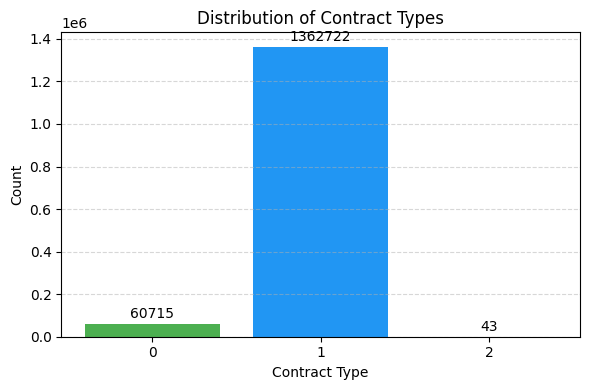

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def count_contract_types(filepath):
    contract_counts = Counter()
    with open(filepath, 'r') as f:
        header = next(f)  
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                contract_type = parts[-1]
                contract_counts[contract_type] += 1
    return contract_counts


file_path = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ocase1.txt'


counts = count_contract_types(file_path)


contract_types = sorted(counts.keys())
frequencies = [counts[ctype] for ctype in contract_types]


plt.figure(figsize=(6, 4))
bars = plt.bar(contract_types, frequencies, color=['#4CAF50', '#2196F3', '#FFC107'])
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Distribution of Contract Types')
plt.xticks(contract_types)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(frequencies)*0.01, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


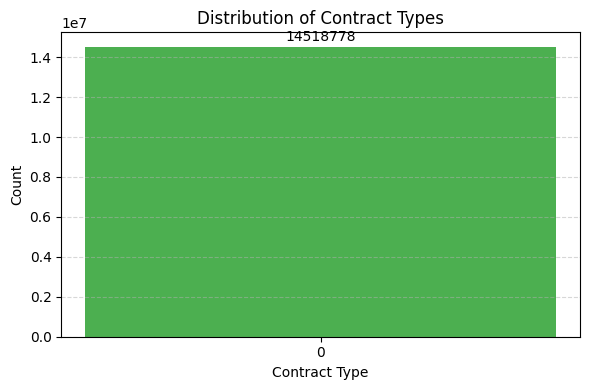

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def count_contract_types(filepath):
    contract_counts = Counter()
    with open(filepath, 'r') as f:
        header = next(f)  
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                contract_type = parts[-1]
                contract_counts[contract_type] += 1
    return contract_counts


file_path = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ocase2.txt'


counts = count_contract_types(file_path)


contract_types = sorted(counts.keys())
frequencies = [counts[ctype] for ctype in contract_types]

plt.figure(figsize=(6, 4))
bars = plt.bar(contract_types, frequencies, color=['#4CAF50', '#2196F3', '#FFC107'])
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Distribution of Contract Types')
plt.xticks(contract_types)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(frequencies)*0.01, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


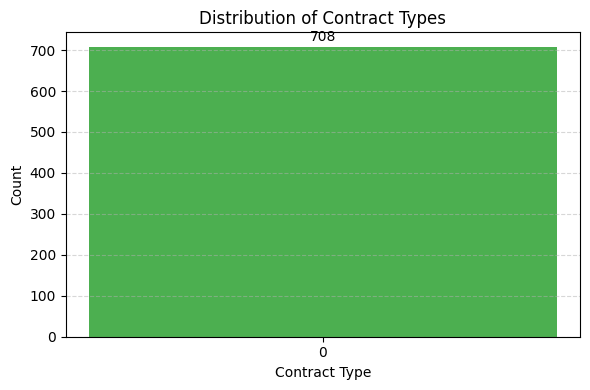

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def count_contract_types(filepath):
    contract_counts = Counter()
    with open(filepath, 'r') as f:
        header = next(f)  # Skip header
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                contract_type = parts[-1]
                contract_counts[contract_type] += 1
    return contract_counts


file_path = r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\common_nodes.txt'

counts = count_contract_types(file_path)


contract_types = sorted(counts.keys())
frequencies = [counts[ctype] for ctype in contract_types]


plt.figure(figsize=(6, 4))
bars = plt.bar(contract_types, frequencies, color=['#4CAF50', '#2196F3', '#FFC107'])
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Distribution of Contract Types')
plt.xticks(contract_types)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(frequencies)*0.01, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px


df = pd.read_csv(r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ord-in-c.txt', sep='\t')


degree_counts = df.groupby('indegree').size().reset_index(name='node_count')
degree_counts = degree_counts.sort_values('indegree')

fig = px.scatter(
    degree_counts,
    x='indegree',
    y='node_count',
    title='Node Count vs In-Degree Distribution (Log-Log)',
    labels={'indegree': 'In-Degree', 'node_count': 'Node Count'},
    log_x=True,
    log_y=True
)


fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='log'
    ),
    yaxis=dict(type='log'),
    template='plotly_white', 
    height=600
)


fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


df = pd.read_csv(r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ord-out-c.txt', sep='\t')


degree_counts = df.groupby('outdegree').size().reset_index(name='node_count')
degree_counts = degree_counts.sort_values('outdegree')


fig = px.scatter(
    degree_counts,
    x='outdegree',
    y='node_count',
    title='Node Count vs out-Degree Distribution (Log-Log)',
    labels={'outdegree': 'out-Degree', 'node_count': 'Node Count'},
    log_x=True,
    log_y=True
)


fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='log'
    ),
    yaxis=dict(type='log'),
    template='plotly_dark', 
    height=600
)


fig.show()


In [ ]:
import pandas as pd

file_path = r"C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\mismatch_output.txt"  
df = pd.read_csv(file_path, sep=' ', header=None)

df.columns = ['node', 'in_degree', 'out_degree', 'weighted_in_degree', 'weighted_out_degree']

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

case1 = df[(df['in_degree'] > 0) & (df['weighted_in_degree'] == 0)]

case2 = df[(df['out_degree'] > 0) & (df['weighted_out_degree'] == 0)]

case3 = df[
    (df['in_degree'] > 0) & 
    (df['out_degree'] > 0) & 
    (df['weighted_in_degree'] == 0) & 
    (df['weighted_out_degree'] == 0)
]

print("Case 1: in_degree > 0 and weighted_in_degree == 0  ", len(case1))
print("Case 2: out_degree > 0 and weighted_out_degree == 0  ", len(case2))
print("Case 3: in/out > 0 and both weighted = 0  ", len(case3))


Case 1: in_degree > 0 and weighted_in_degree == 0   1423480
Case 2: out_degree > 0 and weighted_out_degree == 0   14518778
Case 3: in/out > 0 and both weighted = 0   708


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\mismatch_output.txt', sep='\s+')

df = df.apply(pd.to_numeric, errors='coerce')

case1 = df[(df['in_degree'] > 0) & (df['weighted_in_degree'] == 0)]
case1_dist = case1.groupby('in_degree').size().reset_index(name='node_count')
case1_dist = case1_dist.sort_values('in_degree')

fig1 = px.scatter(
    case1_dist,
    x='in_degree',
    y='node_count',
    title='Node Count vs In-Degree (Weighted In-Degree = 0)',
    log_x=True,
    log_y=True,
    labels={'in_degree': 'In-Degree', 'node_count': 'Node Count'},
    template='plotly_dark'
)
fig1.update_layout(
    xaxis=dict(rangeslider=dict(visible=True)),
    height=600
)

case2 = df[(df['out_degree'] > 0) & (df['weighted_out_degree'] == 0)]
case2_dist = case2.groupby('out_degree').size().reset_index(name='node_count')
case2_dist = case2_dist.sort_values('out_degree')

fig2 = px.scatter(
    case2_dist,
    x='out_degree',
    y='node_count',
    title='Node Count vs Out-Degree (Weighted Out-Degree = 0)',
    log_x=True,
    log_y=True,
    labels={'out_degree': 'Out-Degree', 'node_count': 'Node Count'},
    template='plotly_dark'
)
fig2.update_layout(
    xaxis=dict(rangeslider=dict(visible=True)),
    height=600
)


fig1.show()
fig2.show()


In [ ]:
import pandas as pd

case1 = pd.read_csv(r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ocase1.txt', 
                    sep='\s+', header=0, dtype={0: 'str', 1: 'float64', 2: 'float64', 3: 'float64', 4: 'float64', 5: 'int'})
case2 = pd.read_csv(r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\ocase2.txt', 
                    sep='\s+', header=0, dtype={0: 'str', 1: 'float64', 2: 'float64', 3: 'float64', 4: 'float64', 5: 'int'})
case3 = pd.read_csv(r'C:\Users\varun\OneDrive\Desktop\major\anomaly\newfolder\common_nodes.txt', 
                    sep='\s+', header=0, dtype={0: 'str', 1: 'float64', 2: 'float64', 3: 'float64', 4: 'float64', 5: 'int'})

print("Case 1 columns:", case1.columns)
print("Case 2 columns:", case2.columns)
print("Case 3 columns:", case3.columns)

case1.columns = ['node', 'in_degree', 'weighted_in_degree', 'out_degree', 'weighted_out_degree', 'contract']
case2.columns = ['node', 'in_degree', 'weighted_in_degree', 'out_degree', 'weighted_out_degree', 'contract']
case3.columns = ['node', 'in_degree', 'weighted_in_degree', 'out_degree', 'weighted_out_degree', 'contract']

case1['in_degree'] = pd.to_numeric(case1['in_degree'], errors='coerce')
case1['weighted_in_degree'] = pd.to_numeric(case1['weighted_in_degree'], errors='coerce')
case1['out_degree'] = pd.to_numeric(case1['out_degree'], errors='coerce')
case1['weighted_out_degree'] = pd.to_numeric(case1['weighted_out_degree'], errors='coerce')

case2['in_degree'] = pd.to_numeric(case2['in_degree'], errors='coerce')
case2['weighted_in_degree'] = pd.to_numeric(case2['weighted_in_degree'], errors='coerce')
case2['out_degree'] = pd.to_numeric(case2['out_degree'], errors='coerce')
case2['weighted_out_degree'] = pd.to_numeric(case2['weighted_out_degree'], errors='coerce')

case3['in_degree'] = pd.to_numeric(case3['in_degree'], errors='coerce')
case3['weighted_in_degree'] = pd.to_numeric(case3['weighted_in_degree'], errors='coerce')
case3['out_degree'] = pd.to_numeric(case3['out_degree'], errors='coerce')
case3['weighted_out_degree'] = pd.to_numeric(case3['weighted_out_degree'], errors='coerce')

case3['score'] = 2 + case3['contract'] 

case1 = case1[~case1['node'].isin(case3['node'])]
case2 = case2[~case2['node'].isin(case3['node'])]

case1['score'] = 1 + case1['contract'] 
case2['score'] = 1 + case2['contract'] 

all_scored = pd.concat([case1, case2, case3])

final = all_scored.groupby('node', as_index=False).agg({
    'in_degree': 'first',
    'out_degree': 'first',
    'weighted_in_degree': 'first',
    'weighted_out_degree': 'first',
    'contract': 'first',
    'score': 'max'
})

final = final.sort_values(by='score', ascending=False)

final.to_csv('final_anomaly_scores.txt', index=False, sep=' ')

print("Final anomaly scores saved to final_anomaly_scores.txt")


Case 1 columns: Index(['node', 'in_degree', 'weighted_in_degree', 'out_degree',
       'weighted_out_degree', 'contract'],
      dtype='object')
Case 2 columns: Index(['node', 'in_degree', 'weighted_in_degree', 'out_degree',
       'weighted_out_degree', 'contract'],
      dtype='object')
Case 3 columns: Index(['node', 'in_degree', 'weighted_in_degree', 'out_degree',
       'weighted_out_degree', 'contract'],
      dtype='object')
✅ Final anomaly scores saved to final_anomaly_scores.txt


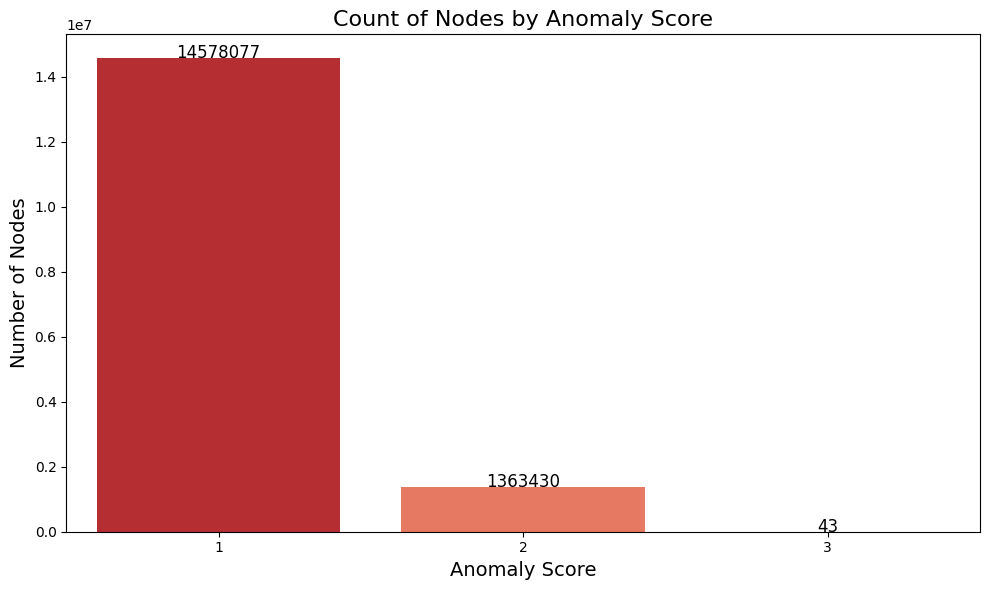

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\varun\OneDrive\Desktop\major\final_anomaly_scores.txt", sep=' ', header=0)


score_counts = df['score'].value_counts().sort_index()


all_scores = [1, 2, 3] 
score_counts = score_counts.reindex(all_scores).fillna(0).astype(int)

score_df = score_counts.reset_index()
score_df.columns = ['score', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=score_df, x='score', y='count', palette='Reds_r')

plt.title('Count of Nodes by Anomaly Score', fontsize=16)
plt.xlabel('Anomaly Score', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)

for index, row in score_df.iterrows():
    plt.text(row.name, row['count'] + 1000, 
             str(row['count']), 
             color='black', ha="center", fontsize=12)

plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd


file_path = r"C:\Users\varun\OneDrive\Desktop\major\final_anomaly_scores.txt"
anomaly_scores = pd.read_csv(file_path, sep=' ', header=0)


anomaly_scores.columns = anomaly_scores.columns.str.strip()

print("Column names:", anomaly_scores.columns.tolist())

filtered_nodes = anomaly_scores[anomaly_scores['score'].isin([2, 3])]

output_path = r"C:\Users\varun\OneDrive\Desktop\major\top_anomalous_nodes.csv"
filtered_nodes.to_csv(output_path, index=False)

print(f"Filtered anomalous nodes with score 2 or 3 saved to:")
print(output_path)


Column names: ['node', 'in_degree', 'out_degree', 'weighted_in_degree', 'weighted_out_degree', 'contract', 'score']
Filtered anomalous nodes with score 2 or 3 saved to:
C:\Users\varun\OneDrive\Desktop\major\top_anomalous_nodes.csv


In [ ]:
import pandas as pd
import os
from collections import Counter
import plotly.graph_objs as go
from plotly.subplots import make_subplots


folder_path = r"D:\bhavya\daywise1"
anomalous_nodes_file = r"C:\Users\varun\OneDrive\Desktop\major\top_anomalous_nodes.csv"

top_anomalies = pd.read_csv(anomalous_nodes_file)
anomalous_nodes = set(top_anomalies['node'].tolist())

daily_counts = Counter()
full_data = []
daywise_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.txt')])

print(f"Total files to read: {len(daywise_files)}")

for idx, file in enumerate(daywise_files):
    file_path = os.path.join(folder_path, file)
    print(f"[{idx+1}/{len(daywise_files)}] Processing file: {file}")
    
    try:
        df = pd.read_csv(file_path, header=None, delim_whitespace=True)
        if df.shape[1] != 8:
            print(f"  !! Warning in {file}: Detected {df.shape[1]} columns instead of 8")
            continue

        df.columns = ['timestamp', 'date', 'time', 'from', 'to', 'fromiscontract', 'toiscontract', 'value']

        df['from'] = pd.to_numeric(df['from'], errors='coerce')
        df['to'] = pd.to_numeric(df['to'], errors='coerce')
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df = df.dropna(subset=['from', 'to', 'date'])

        df_filtered = df[df['from'].isin(anomalous_nodes) | df['to'].isin(anomalous_nodes)]

        date_counts = df_filtered['date'].value_counts()
        for date, count in date_counts.items():
            daily_counts[date] += count

        full_data.append(df_filtered)

    except Exception as e:
        print(f"  !! Error in {file}: {e}")

df_resampled = pd.Series(daily_counts).sort_index()
threshold = df_resampled.quantile(0.95)
bursty_periods = df_resampled[df_resampled > threshold]


fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(
    x=df_resampled.index,
    y=df_resampled.values,
    mode='lines+markers',
    name='Daily Transactions',
    line=dict(color='blue'),
    hovertemplate='Date: %{x}<br>Transactions: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=bursty_periods.index,
    y=bursty_periods.values,
    mode='markers',
    name='Bursty Periods',
    marker=dict(color='red', size=10, symbol='star'),
    hovertemplate='Bursty Date: %{x}<br>Transactions: %{y}<extra></extra>'
))

fig.update_layout(
    title='Daily Transactions of Anomalous Nodes (Interactive)',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    hovermode='closest',
    template='plotly_white',
    height=600,
    showlegend=True
)

fig.show()


Total files to read: 1543
[1/1543] Processing file: 2016-02-13.txt
[2/1543] Processing file: 2016-02-14.txt
[3/1543] Processing file: 2016-02-15.txt
[4/1543] Processing file: 2016-02-16.txt
[5/1543] Processing file: 2016-02-17.txt
[6/1543] Processing file: 2016-02-18.txt
[7/1543] Processing file: 2016-02-19.txt
[8/1543] Processing file: 2016-02-20.txt
[9/1543] Processing file: 2016-02-21.txt
[10/1543] Processing file: 2016-02-22.txt
[11/1543] Processing file: 2016-02-23.txt
[12/1543] Processing file: 2016-02-24.txt
[13/1543] Processing file: 2016-02-25.txt
[14/1543] Processing file: 2016-02-26.txt
[15/1543] Processing file: 2016-02-27.txt
[16/1543] Processing file: 2016-02-28.txt
[17/1543] Processing file: 2016-02-29.txt
[18/1543] Processing file: 2016-03-01.txt
[19/1543] Processing file: 2016-03-02.txt
[20/1543] Processing file: 2016-03-03.txt
[21/1543] Processing file: 2016-03-04.txt
[22/1543] Processing file: 2016-03-05.txt
[23/1543] Processing file: 2016-03-06.txt
[24/1543] Process

c:\Users\varun\anaconda3\envs\MINI2\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[1454/1543] Processing file: 2020-02-05.txt
[1455/1543] Processing file: 2020-02-06.txt
[1456/1543] Processing file: 2020-02-07.txt
[1457/1543] Processing file: 2020-02-08.txt
[1458/1543] Processing file: 2020-02-09.txt
[1459/1543] Processing file: 2020-02-10.txt
[1460/1543] Processing file: 2020-02-11.txt
[1461/1543] Processing file: 2020-02-12.txt
[1462/1543] Processing file: 2020-02-13.txt
[1463/1543] Processing file: 2020-02-14.txt
[1464/1543] Processing file: 2020-02-15.txt
[1465/1543] Processing file: 2020-02-16.txt
[1466/1543] Processing file: 2020-02-17.txt
[1467/1543] Processing file: 2020-02-18.txt
[1468/1543] Processing file: 2020-02-19.txt
[1469/1543] Processing file: 2020-02-20.txt
[1470/1543] Processing file: 2020-02-21.txt
[1471/1543] Processing file: 2020-02-22.txt
[1472/1543] Processing file: 2020-02-23.txt
[1473/1543] Processing file: 2020-02-24.txt
[1474/1543] Processing file: 2020-02-25.txt
[1475/1543] Processing file: 2020-02-26.txt
[1476/1543] Processing file: 202

In [ ]:
import pandas as pd
import os
from collections import Counter
import plotly.graph_objs as go
from plotly.subplots import make_subplots


folder_path = r"D:\bhavya\daywise1"
anomalous_nodes_file = r"C:\Users\varun\OneDrive\Desktop\major\top_anomalous_nodes.csv"

top_anomalies = pd.read_csv(anomalous_nodes_file)
anomalous_nodes = set(top_anomalies['node'].tolist())

daily_counts = Counter()
full_data = []
daywise_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.txt')])

print(f"Total files to read: {len(daywise_files)}")

for idx, file in enumerate(daywise_files):
    file_path = os.path.join(folder_path, file)
    print(f"[{idx+1}/{len(daywise_files)}] Processing file: {file}")
    
    try:
        df = pd.read_csv(file_path, header=None, delim_whitespace=True)
        if df.shape[1] != 8:
            print(f"  !! Warning in {file}: Detected {df.shape[1]} columns instead of 8")
            continue

        df.columns = ['timestamp', 'date', 'time', 'from', 'to', 'fromiscontract', 'toiscontract', 'value']

        df['from'] = pd.to_numeric(df['from'], errors='coerce')
        df['to'] = pd.to_numeric(df['to'], errors='coerce')
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df = df.dropna(subset=['from', 'to', 'date'])

        df_filtered = df[df['from'].isin(anomalous_nodes) | df['to'].isin(anomalous_nodes)]

        date_counts = df_filtered['date'].value_counts()
        for date, count in date_counts.items():
            daily_counts[date] += count

        full_data.append(df_filtered)

    except Exception as e:
        print(f"  !! Error in {file}: {e}")


df_resampled = pd.Series(daily_counts).sort_index()
threshold = df_resampled.quantile(0.93)
bursty_periods = df_resampled[df_resampled > threshold]

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(
    x=df_resampled.index,
    y=df_resampled.values,
    mode='lines+markers',
    name='Daily Transactions',
    line=dict(color='blue'),
    hovertemplate='Date: %{x}<br>Transactions: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=bursty_periods.index,
    y=bursty_periods.values,
    mode='markers',
    name='Bursty Periods',
    marker=dict(color='red', size=10, symbol='star'),
    hovertemplate='Bursty Date: %{x}<br>Transactions: %{y}<extra></extra>'
))

fig.update_layout(
    title='Daily Transactions of Anomalous Nodes (Interactive)',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    hovermode='closest',
    template='plotly_white',
    height=600,
    showlegend=True
)

fig.show()


Total files to read: 1543
[1/1543] Processing file: 2016-02-13.txt
[2/1543] Processing file: 2016-02-14.txt
[3/1543] Processing file: 2016-02-15.txt
[4/1543] Processing file: 2016-02-16.txt
[5/1543] Processing file: 2016-02-17.txt
[6/1543] Processing file: 2016-02-18.txt
[7/1543] Processing file: 2016-02-19.txt
[8/1543] Processing file: 2016-02-20.txt
[9/1543] Processing file: 2016-02-21.txt
[10/1543] Processing file: 2016-02-22.txt
[11/1543] Processing file: 2016-02-23.txt
[12/1543] Processing file: 2016-02-24.txt
[13/1543] Processing file: 2016-02-25.txt
[14/1543] Processing file: 2016-02-26.txt
[15/1543] Processing file: 2016-02-27.txt
[16/1543] Processing file: 2016-02-28.txt
[17/1543] Processing file: 2016-02-29.txt
[18/1543] Processing file: 2016-03-01.txt
[19/1543] Processing file: 2016-03-02.txt
[20/1543] Processing file: 2016-03-03.txt
[21/1543] Processing file: 2016-03-04.txt
[22/1543] Processing file: 2016-03-05.txt
[23/1543] Processing file: 2016-03-06.txt
[24/1543] Process

c:\Users\varun\anaconda3\envs\MINI2\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



[1454/1543] Processing file: 2020-02-05.txt
[1455/1543] Processing file: 2020-02-06.txt
[1456/1543] Processing file: 2020-02-07.txt
[1457/1543] Processing file: 2020-02-08.txt
[1458/1543] Processing file: 2020-02-09.txt
[1459/1543] Processing file: 2020-02-10.txt
[1460/1543] Processing file: 2020-02-11.txt
[1461/1543] Processing file: 2020-02-12.txt
[1462/1543] Processing file: 2020-02-13.txt
[1463/1543] Processing file: 2020-02-14.txt
[1464/1543] Processing file: 2020-02-15.txt
[1465/1543] Processing file: 2020-02-16.txt
[1466/1543] Processing file: 2020-02-17.txt
[1467/1543] Processing file: 2020-02-18.txt
[1468/1543] Processing file: 2020-02-19.txt
[1469/1543] Processing file: 2020-02-20.txt
[1470/1543] Processing file: 2020-02-21.txt
[1471/1543] Processing file: 2020-02-22.txt
[1472/1543] Processing file: 2020-02-23.txt
[1473/1543] Processing file: 2020-02-24.txt
[1474/1543] Processing file: 2020-02-25.txt
[1475/1543] Processing file: 2020-02-26.txt
[1476/1543] Processing file: 202

In [ ]:
import pandas as pd
import os
from collections import Counter
import plotly.graph_objs as go
from plotly.subplots import make_subplots

folder_path = r"D:\bhavya\daywise1"
anomalous_nodes_file = r"C:\Users\varun\OneDrive\Desktop\major\top_anomalous_nodes.csv"

top_anomalies = pd.read_csv(anomalous_nodes_file)
anomalous_nodes = set(top_anomalies['node'].tolist())

daily_counts = Counter()
full_data = []
daywise_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.txt')])

print(f"Total files to read: {len(daywise_files)}")

for idx, file in enumerate(daywise_files):
    file_path = os.path.join(folder_path, file)
    print(f"[{idx+1}/{len(daywise_files)}] Processing file: {file}")
    
    try:
        df = pd.read_csv(file_path, header=None, delim_whitespace=True)
        if df.shape[1] != 8:
            print(f"  !! Warning in {file}: Detected {df.shape[1]} columns instead of 8")
            continue

        df.columns = ['timestamp', 'date', 'time', 'from', 'to', 'fromiscontract', 'toiscontract', 'value']

        df['from'] = pd.to_numeric(df['from'], errors='coerce')
        df['to'] = pd.to_numeric(df['to'], errors='coerce')
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df = df.dropna(subset=['from', 'to', 'date'])

        df_filtered = df[df['from'].isin(anomalous_nodes) | df['to'].isin(anomalous_nodes)]

        date_counts = df_filtered['date'].value_counts()
        for date, count in date_counts.items():
            daily_counts[date] += count

        full_data.append(df_filtered)

    except Exception as e:
        print(f"  !! Error in {file}: {e}")


df_resampled = pd.Series(daily_counts).sort_index()
threshold = df_resampled.quantile(0.85)
bursty_periods = df_resampled[df_resampled > threshold]

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(
    x=df_resampled.index,
    y=df_resampled.values,
    mode='lines+markers',
    name='Daily Transactions',
    line=dict(color='blue'),
    hovertemplate='Date: %{x}<br>Transactions: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=bursty_periods.index,
    y=bursty_periods.values,
    mode='markers',
    name='Bursty Periods',
    marker=dict(color='red', size=10, symbol='star'),
    hovertemplate='Bursty Date: %{x}<br>Transactions: %{y}<extra></extra>'
))

fig.update_layout(
    title='Daily Transactions of Anomalous Nodes (Interactive)',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    hovermode='closest',
    template='plotly_white',
    height=600,
    showlegend=True
)

fig.show()


Total files to read: 1543
[1/1543] Processing file: 2016-02-13.txt
[2/1543] Processing file: 2016-02-14.txt
[3/1543] Processing file: 2016-02-15.txt
[4/1543] Processing file: 2016-02-16.txt
[5/1543] Processing file: 2016-02-17.txt
[6/1543] Processing file: 2016-02-18.txt
[7/1543] Processing file: 2016-02-19.txt
[8/1543] Processing file: 2016-02-20.txt
[9/1543] Processing file: 2016-02-21.txt
[10/1543] Processing file: 2016-02-22.txt
[11/1543] Processing file: 2016-02-23.txt
[12/1543] Processing file: 2016-02-24.txt
[13/1543] Processing file: 2016-02-25.txt
[14/1543] Processing file: 2016-02-26.txt
[15/1543] Processing file: 2016-02-27.txt
[16/1543] Processing file: 2016-02-28.txt
[17/1543] Processing file: 2016-02-29.txt
[18/1543] Processing file: 2016-03-01.txt
[19/1543] Processing file: 2016-03-02.txt
[20/1543] Processing file: 2016-03-03.txt
[21/1543] Processing file: 2016-03-04.txt
[22/1543] Processing file: 2016-03-05.txt
[23/1543] Processing file: 2016-03-06.txt
[24/1543] Process

c:\Users\varun\anaconda3\envs\MINI2\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



[1454/1543] Processing file: 2020-02-05.txt
[1455/1543] Processing file: 2020-02-06.txt
[1456/1543] Processing file: 2020-02-07.txt
[1457/1543] Processing file: 2020-02-08.txt
[1458/1543] Processing file: 2020-02-09.txt
[1459/1543] Processing file: 2020-02-10.txt
[1460/1543] Processing file: 2020-02-11.txt
[1461/1543] Processing file: 2020-02-12.txt
[1462/1543] Processing file: 2020-02-13.txt
[1463/1543] Processing file: 2020-02-14.txt
[1464/1543] Processing file: 2020-02-15.txt
[1465/1543] Processing file: 2020-02-16.txt
[1466/1543] Processing file: 2020-02-17.txt
[1467/1543] Processing file: 2020-02-18.txt
[1468/1543] Processing file: 2020-02-19.txt
[1469/1543] Processing file: 2020-02-20.txt
[1470/1543] Processing file: 2020-02-21.txt
[1471/1543] Processing file: 2020-02-22.txt
[1472/1543] Processing file: 2020-02-23.txt
[1473/1543] Processing file: 2020-02-24.txt
[1474/1543] Processing file: 2020-02-25.txt
[1475/1543] Processing file: 2020-02-26.txt
[1476/1543] Processing file: 202

In [ ]:
import pandas as pd
import os
from collections import Counter
import plotly.graph_objs as go
from plotly.subplots import make_subplots


folder_path = r"D:\bhavya\daywise1"
anomalous_nodes_file = r"C:\Users\varun\OneDrive\Desktop\major\top_anomalous_nodes.csv"

top_anomalies = pd.read_csv(anomalous_nodes_file)
anomalous_nodes = set(top_anomalies['node'].tolist())

daily_counts = Counter()
full_data = []
daywise_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.txt')])

print(f"Total files to read: {len(daywise_files)}")

for idx, file in enumerate(daywise_files):
    file_path = os.path.join(folder_path, file)
    print(f"[{idx+1}/{len(daywise_files)}] Processing file: {file}")
    
    try:
        df = pd.read_csv(file_path, header=None, delim_whitespace=True)
        if df.shape[1] != 8:
            print(f"  !! Warning in {file}: Detected {df.shape[1]} columns instead of 8")
            continue

        df.columns = ['timestamp', 'date', 'time', 'from', 'to', 'fromiscontract', 'toiscontract', 'value']

        df['from'] = pd.to_numeric(df['from'], errors='coerce')
        df['to'] = pd.to_numeric(df['to'], errors='coerce')
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df = df.dropna(subset=['from', 'to', 'date'])

        df_filtered = df[df['from'].isin(anomalous_nodes) | df['to'].isin(anomalous_nodes)]

        date_counts = df_filtered['date'].value_counts()
        for date, count in date_counts.items():
            daily_counts[date] += count

        full_data.append(df_filtered)

    except Exception as e:
        print(f"  !! Error in {file}: {e}")


df_resampled = pd.Series(daily_counts).sort_index()
threshold = df_resampled.quantile(0.98)
bursty_periods = df_resampled[df_resampled > threshold]


fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(
    x=df_resampled.index,
    y=df_resampled.values,
    mode='lines+markers',
    name='Daily Transactions',
    line=dict(color='blue'),
    hovertemplate='Date: %{x}<br>Transactions: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=bursty_periods.index,
    y=bursty_periods.values,
    mode='markers',
    name='Bursty Periods',
    marker=dict(color='red', size=10, symbol='star'),
    hovertemplate='Bursty Date: %{x}<br>Transactions: %{y}<extra></extra>'
))

fig.update_layout(
    title='Daily Transactions of Anomalous Nodes (Interactive)',
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    hovermode='closest',
    template='plotly_white',
    height=600,
    showlegend=True
)

fig.show()


Total files to read: 1543
[1/1543] Processing file: 2016-02-13.txt
[2/1543] Processing file: 2016-02-14.txt
[3/1543] Processing file: 2016-02-15.txt
[4/1543] Processing file: 2016-02-16.txt
[5/1543] Processing file: 2016-02-17.txt
[6/1543] Processing file: 2016-02-18.txt
[7/1543] Processing file: 2016-02-19.txt
[8/1543] Processing file: 2016-02-20.txt
[9/1543] Processing file: 2016-02-21.txt
[10/1543] Processing file: 2016-02-22.txt
[11/1543] Processing file: 2016-02-23.txt
[12/1543] Processing file: 2016-02-24.txt
[13/1543] Processing file: 2016-02-25.txt
[14/1543] Processing file: 2016-02-26.txt
[15/1543] Processing file: 2016-02-27.txt
[16/1543] Processing file: 2016-02-28.txt
[17/1543] Processing file: 2016-02-29.txt
[18/1543] Processing file: 2016-03-01.txt
[19/1543] Processing file: 2016-03-02.txt
[20/1543] Processing file: 2016-03-03.txt
[21/1543] Processing file: 2016-03-04.txt
[22/1543] Processing file: 2016-03-05.txt
[23/1543] Processing file: 2016-03-06.txt
[24/1543] Process

c:\Users\varun\anaconda3\envs\MINI2\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[1454/1543] Processing file: 2020-02-05.txt
[1455/1543] Processing file: 2020-02-06.txt
[1456/1543] Processing file: 2020-02-07.txt
[1457/1543] Processing file: 2020-02-08.txt
[1458/1543] Processing file: 2020-02-09.txt
[1459/1543] Processing file: 2020-02-10.txt
[1460/1543] Processing file: 2020-02-11.txt
[1461/1543] Processing file: 2020-02-12.txt
[1462/1543] Processing file: 2020-02-13.txt
[1463/1543] Processing file: 2020-02-14.txt
[1464/1543] Processing file: 2020-02-15.txt
[1465/1543] Processing file: 2020-02-16.txt
[1466/1543] Processing file: 2020-02-17.txt
[1467/1543] Processing file: 2020-02-18.txt
[1468/1543] Processing file: 2020-02-19.txt
[1469/1543] Processing file: 2020-02-20.txt
[1470/1543] Processing file: 2020-02-21.txt
[1471/1543] Processing file: 2020-02-22.txt
[1472/1543] Processing file: 2020-02-23.txt
[1473/1543] Processing file: 2020-02-24.txt
[1474/1543] Processing file: 2020-02-25.txt
[1475/1543] Processing file: 2020-02-26.txt
[1476/1543] Processing file: 202